# Scaling and Normalization
#### Transforming numeric value to get useful properties

we will see  how to scale and normalize data and what is differnce between two.

# Get environment setup

Load libraries we need to work with our data.

In [1]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

#for min-max scaling
from mlxtend.preprocessing import minmax_scaling

# for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# seed for reproducibility
np.random.seed(0)

# Scaling

This means <b>Transforming/restricting</b> our data so that it fits within specific range like 0-100 or 0-10 <br>
we will scale our data when we're using methods based on measures of <B><I>how far apart data points are </B></I>, like <i>support vector machines (SVM)</i> or <i>k-nearest neighbors (KNN)</i>. With these algorithms, a change of "1" in any numeric feature is given the same importance.

For example, you might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if you don't scale your prices, methods like SVM or KNN will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar! This clearly doesn't fit with our intuitions of the world. With currency, you can convert between currencies. But what about if you're looking at something like height and weight? It's not entirely clear how many pounds should equal one inch (or how many kilograms should equal one meter).

By scaling our variables, we can compare different variables on equal footing. 

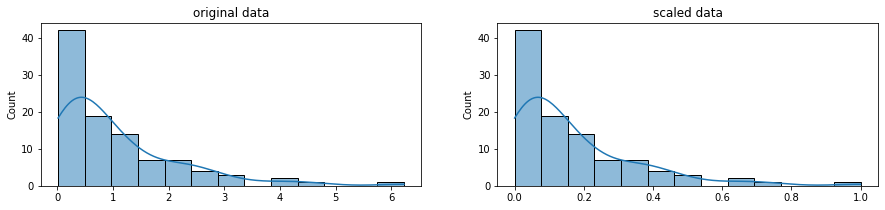

In [34]:
# Generate 1000 points random drawn from exponential distribution
original_data = np.random.exponential( size = 100 )

# min-max scale the data between 0 and 1
scaled_data = minmax_scaling( original_data , columns=[0] )

# plot both together
fig , ax = plt.subplots(1,2, figsize=(15,3))
sns.histplot( data = original_data , ax=ax[0] , kde=True , legend = False )
ax[0].set_title( 'original data' )

sns.histplot( data = scaled_data , ax=ax[1] , kde=True , legend = False )
ax[1].set_title( 'scaled data' )
plt.show()

Notice that the shape of the data doesn't change, but that instead of ranging from 0 to 6, it now ranges from 0 to 1.

# Normalization

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change our observations so that they can be described as a normal distribution.<br>
In easy words it is make distribution of our original data normal distibution


<b>Normal Distribution</b> - Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, we'll normalize our data if we're going to be using a machine learning or statistics technique that assumes our data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes.<br>
(Pro tip: any method with "Gaussian" in the name probably assumes normality.)

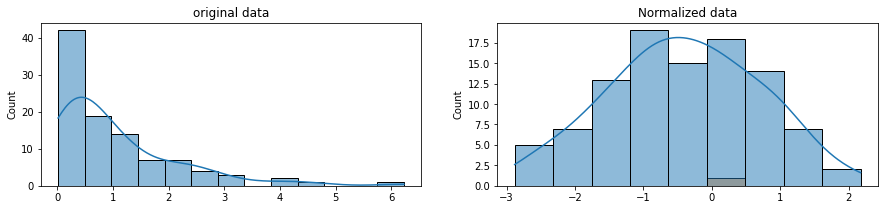

In [35]:
# normilizing original data with Box-Cox Transformation
normalized_data = stats.boxcox(original_data)

# plot to compare both
fig , ax = plt.subplots( 1 , 2 , figsize=( 15 , 3 ) )
sns.histplot( data = original_data , ax=ax[0] ,legend = False , kde =True)
ax[0].set_title('original data')

sns.histplot( data = normalized_data , ax=ax[1] ,legend = False , kde =True)
ax[1].set_title('Normalized data')
plt.show()